In [2]:
import glob 
import importlib
import cameramodel_comparison
importlib.reload(cameramodel_comparison)

from cameramodel_comparison import (
    run_dis_plot, 
    run_rpe,
    run_combined_plot,
    get_image_points
    
)


In [3]:
#DATA
all_images = glob.glob("./data/SD128_35mm/*.JPG")
num_params_list = [2, 3, 5, 8]
all_dist_labels = ["k1","k2","p1","p2","k3"]
objpoints, imgpoints = get_image_points(all_images)



# **Praktikumsbericht - Analyse der Verzerrungsparameter unter Verwendung unterschiedlicher Kalibrierungsmodelle in OpenCV**


## **Inhaltsverzeichnis**

1. [Einleitung](#Einleitung)
   1. [Ziel](#Ziel)
2. [Methodik](#Methodik)
   1. [Bildaufnahme](#Bildaufnahme)
   2. [Kamerakalibrierung mit unterschiedlichen Modellen](#Kamerakalibrierung)
   3. [Analyse der radialen und tangentialen Verzerrungsparameter](#Analyse-Verzerrungsparameter)
   4. [Analyse der kombinierten radialen Verzerrung](#Kombinierte-radiale-Verzerrung)
   5. [Analyse des Reprojektionsfehlers und Akaike-Informationskriteriums (AIC)](#Reprojektionsfehler-AIC)
3. [Resultate](#Resultate)
   1. [Radiale Verzerrungsparameter k₁, k₂, k₃](#Radiale-Verzerrung)
   2. [Tangentiale Verzerrungsparameter p₁, p₂](#Tangentiale-Verzerrung)
   3. [Kombinierte radiale Verzerrungskurve](#Kombinierte-radiale-Verzerrungskurve)
   4. [Reprojektionsfehler (RPE) und Akaike-Informationskriterium (AIC)](#RPE-AIC)
4. [Zusammenfassung](#Zusammengfassung)


## 1. <a id="Einleitung"></a>**Einleitung**



Die Kamerakalibrierung ist ein Datenanpassungsproblem, bei dem die Wahl des richtigen Kalibrierungsmodells wichtig ist, um die theoretischen Verzerrungsparameter optimal an die aufgenommenen Bilder anzupassen. Innerhalb der OpenCV-Bibliothek stehen verschiedene Kalibrierungsmodelle zur Verfügung die unterschiedliche Kombinationen radialer (k₁, k₂, k₃, k₄, k₅, k₆) und tangentialer (p₁, p₂) Verzerrungskoeffizienten berücksichtigen.

<sup>1</sup>Quelle: Calib.io

### 1.1 <a id="Ziel"></a>**Ziel**

Die vorliegende Arbeit befasst sich mit der Untersuchung der Auswirkungen unterschiedlicher Kalibrierungsmodelle auf die Schätzung der Verzerrungsparameter (k₁, k₂, k₃, p₁, p₂) sowie der Bewertung der Stabilität und Genauigkeit dieser Schätzungen in Abhängigkeit von der Anzahl der verwendeten Kalibrierungsbilder. Darüber hinaus erfolgt ein Vergleich der Eignung der Modelle anhand des Reprojektionsfehlers (RPE) und des Akaike-Informationskriteriums (AIC).



## 2. <a id="Methodik"></a>**Methodik**

### 2.1 <a id="Bildaufnahme"></a>**Bildaufnahme**

Im Rahmen der Kamerakalibrierung in einem Single-Camera-Setup wurden insgesamt 114 Fotos aufgenommen. Die Aufnahmen wurden mit einem feststehenden Stativ durchgeführt, wobei ein Schachbrettmuster als Kalibrierungsobjekt diente. Das Schachbrettmuster wurde dabei aus verschiedenen Posen aufgenommen, wobei auch geneigte Positionen sowie ein kontinuierliches Verschieben des Schachbrettes berücksichtigt wurden, um eine umfassende Kalibrierung der Kamera zu gewährleisten.

### 2.2 <a id="Kamerakalibrierung"></a>**Kamerakalibrierung mit unterschiedlichen Modellen**

Im Rahmen der Kalibrierung wurden vier verschiedene Kalibrierungsmodelle verwendet, die jeweils eine unterschiedliche Anzahl von Verzerrungsparametern berücksichtigten.

- **Modell 2:** Verwendung von 2 Verzerrungsparametern (radiale Verzerrung, **k₁, k₂**).
- **Modell 3:** Verwendung von 3 Verzerrungsparametern (radiale Verzerrung, **k₁, k₂, k₃**).
- **Modell 5:** Verwendung von 5 Verzerrungsparametern (radiale und tangentiale Verzerrung, **k₁, k₂, k₃, p₁, p₂**).
- **Modell 8:** 8 Verzerrungsparameter (**k₁, k₂, k₃, p₁, p₂**). Die zusätzlichen Parameter **k₄, k₅, k₆** wurden nicht berücksichtigt, da OpenCV diese Parameter automatisch auf 0 setzt, wenn keine entsprechende Verzerrung höheren Grades (beschrieben durch **k₄, k₅, k₆**) im Bild detektiert wird.

<sup>2</sup>Quelle: OpenCV Dokumentation

### 2.3 <a id="Analyse-Verzerrungsparameter"></a>**Analyse der radialen und tangentialen Verzerrungsparameter**

Die Kalibrierung wurde für jedes Bild durchgeführt, wobei die Anzahl der verwendeten Bilder schrittweise erhöht wurde. Für jedes Kalibrierungsmodell wurden die Verzerrungskoeffizienten (k₁, k₂, k₃, p₁, p₂) ermittelt und in Abhängigkeit von der Bildanzahl analysiert.

Es wurde untersucht, wie sich diese Verzerrungsparameter bei den verschiedenen Kamerakalibrierungsmodellen verhalten und wie sie mit zunehmender Anzahl von Kalibrierungsbildern variieren. Dabei wurde insbesondere überprüft, ob eine Stabilisierung der Parameter bei einer bestimmten Bildanzahl erreicht wird, was darauf hinweist, dass eine ausreichende Menge an Daten für eine präzise Kalibrierung vorhanden ist.

### 2.4 <a id="Kombinierte-radiale-Verzerrung"></a>**Analyse der kombinierten radialen Verzerrung**

Die Analyse radialer Verzerrungskoeffizienten erfordert eine kombinierte Betrachtung, da sie in gegenseitiger Abhängigkeit stehen und gemeinsam die Gesamtverzerrung des Bildes bestimmen. Nur durch eine kombinierte Analyse kann ein umfassendes Verständnis der Verzerrungscharakteristik gewonnen werden.

Die Verzerrung wird durch folgende Gleichung modelliert, die beschreibt, wie die Verzerrung als Funktion des radialen Abstands 𝑟 von der Bildmitte berechnet wird:

$$
\text{Verzerrung} = k_1 \cdot r^2 + k_2 \cdot r^4 + k_3 \cdot r^6
$$

<sup>3</sup>Quelle: Mathworks

wobei:

-  k₁, k₂, k₃ die Verzerrungskoeffizienten sind
- r die normalisierte radiale Distanz ist, berechnet als r² = x²  + y².

### 2.5 <a id="Reprojektionsfehler-AIC"></a>**Analyse des Reprojektionsfehlers und Akaike-Informationskriteriums (AIC)**

Der Reprojektionsfehler (RPE) wurde für jede mögliche Anzahl von Kalibrierungsbildern berechnet, wobei die Anzahl der verwendeten Bilder schrittweise erhöht wurde. Der RPE wurde zusätzlich als Qualitätsmetrik verwendet, um die Genauigkeit der Kalibrierung zu bewerten.

Der RPE misst die Differenz zwischen den projizierten Punkten (basierend auf den kalibrierten Parametern) und den tatsächlich erfassten Bildpunkten. Ein niedriger RPE deutet auf eine hohe Genauigkeit der Kalibrierung hin. Im Rahmen dieser Arbeit wurde der RPE unter Verwendung der L2-Norm (OpenCV) berechnet.

$$
\text{RPE} = \frac{1}{N} \sum_{i=1}^{N} \| \mathbf{x}_i - \mathbf{x}_i' \|_{L2}
$$

<sup>4</sup>Quelle: OpenCV Dokumentation

wobei:

-  _N_ die Anzahl der Bildpunkte ist
- _x<sub>i</sub>_ die tatsächlichen Bildpunkte und _x<sub>i'</sub>_ die projizierten Bildpunkte darstellt.

Zur Evaluierung der Modelle wurde zusätzlich zum RPE das Akaike-Informationskriterium (AIC) berechnet. Das AIC berücksichtigt sowohl die Anpassungsgüte des Modells, welche durch den RPE repräsentiert wird, als auch die Komplexität des Modells, welche durch die Anzahl der geschätzten Parameter definiert ist.

Das allgemeine AIC wird durch die folgende Formel berechnet:

$$
\text{AIC} = 2k - 2\ln(\hat{L})
$$
<sup>5</sup>Quelle: Scribbr

wobei:

- _k_ die Anzahl der Modellparameter ist
- _L_ die maximale Likelihood-Funktion darstellt.

Die AIC-Formel wurde angepasst, indem die maximale Likelihood _L_ durch den Reprojektionsfehler (RPE) ersetzt wurde, der als Ersatzindikator für die Anpassungsgüte dient. Das angepasste AIC wurde durch die folgende Formel berechnet:

$$
\text{AIC} = 2k + n \ln(\text{RPE})
$$

wobei:

- _k_ die Anzahl der Modellparameter sind
- _n_ die Anzahl der verwendeten Bildpunkte. 

## 3. <a id="Resultate"></a>Resultate 

### 3.1.1 <a id="Radiale-Verzerrung"></a>**Radiale Verzerrungsparameter *k₁, k₂, k₃***

Die radiale Verzerrung (k₁, k₂, k₃) entsteht, wenn Lichtstrahlen in der Nähe der Ränder eines Objektivs stärker abgelenkt werden als im optischen Zentrum. Die Verzerrung kann entweder als Kissenverzerrung auftreten, bei der die Bildränder nach innen gezogen werden (positive radiale Verzerrung), oder als Tonnenverzerrung, bei der die Bildränder nach außen gewölbt erscheinen (negative radiale Verzerrung).

<sup>1</sup>Quelle: Mathworks

Die nachfolgenden Diagramme, welche den Titel "Verzerrungsparameter über verschiedene Kameramodelle" tragen, zeigen auf der x-Achse die Anzahl der Bilder und auf der y-Achse den jeweiligen Wert des Verzerrungsparameters.

**Initiale Schwankungen und Stabilisierung**

Es lässt sich beobachten, dass alle drei Modelle (mit 3, 5 und 8 Parametern) zu Beginn eine gewisse Schwankung in den Verzerrungsparametern *k₁*, *k₂* und *k₃* aufweisen, wobei dies insbesondere für das Modell mit 3 Parametern zutrifft. Diese Schwankungen sind bei den Modellen mit 5 und 8 Parametern weniger stark ausgeprägt.

Im Vergleich dazu zeigt das Modell mit 2 Parametern eine stabilere Entwicklung der Parameter *k₁* und *k₂* ohne extreme anfängliche Schwankungen. Diese scheinbare Stabilität könnte jedoch darauf hindeuten, dass das Modell aufgrund seiner geringeren Komplexität nicht in der Lage ist, die tatsächlichen Verzerrungen vollständig zu erfassen und daher weniger empfindlich auf die Variabilität der Daten reagiert.

**Plateau**

Nach einer Anzahl von etwa 20 bis 30 Bildern erreichen die Modelle mit 5 und 8 Parametern ein Plateau, welches höhere Werte für den Parameter *k₁* aufweist als das Modell mit 2 Parametern. Das Modell mit 3 Parametern zeigt für den Parameter *k₁* eine leicht höhere Verzerrung, als die Modelle mit 5 und 8 Parametern, aber konvergiert mit der Zunahme von Bildern. Für die Parameter *k₂* und *k₃*, erreicht das Model ähnliche Werte, wie die komplexeren Modelle mit 5 und 8 Parametern.

In sämtlichen Modellen ist zwischen 60 und 100 Bildern sind Schwankungen der Parameterwerte zu beobachten. Dies lässt den Schluss zu, dass die Modelle sensibel auf zusätzliche Bilder reagieren und möglicherweise noch feine Anpassungen an den Daten vornehmen, auch nachdem eine anfängliche Stabilisierung erreicht wurde.

**Finale Verzerrungsparameter**

- Das Modell mit 3 Parametern zeigt in sämtlichen Fällen die höchsten finalen Werte für *k₁* (**0.06550**), *k₂* (**–0.71487**) und *k₃* (**1.45738**). Dies lässt den Schluss zu, dass eine stärkere Verzerrung kompensiert wird.
  
- Die Modelle mit 5 bzw. 8 Parametern weisen für die finalen Werte von *k₁* (**-0.6399**), *k₂* (**-0.70994**) und *k₃* (**1.43169**), wie zu erwarten war, identische Ergebnisse auf. Diese Resultate sind erwartungsgemäß konsistent, da die zusätzlichen Parameter k₄, k₅ und k₆ im Modell mit 8 Parametern auf null gesetzt sind. Dies ist darauf zurückzuführen, dass in den verwendeten Bildern keine Verzerrungen dieser Art detektiert wurden.

- Das Modell mit 2 Parametern zeigt den niedrigsten endgültigen *k₁*-Wert (**0.04803**) und *k₂*-Wert (**–0.42255**), was darauf hindeutet, dass es aufgrund seiner geringeren Komplexität möglicherweise nicht in der Lage ist, die komplexeren Verzerrungen vollständig zu erfassen und zu kompensieren.

### 3.2 <a id="Tangentiale-Verzerrung"></a>**Tangentiale Verzerrungsparameter *p₁, p₂***

Die tangentiale Verzerrung (p₁, p₂) tritt auf, wenn das Objektiv und die Bildebene nicht parallel zueinander ausgerichtet sind.  Die Präsenz dieser Verzerrung lässt auf eine mechanische Unregelmäßigkeit oder einen Fehler in der Montage der Kamera oder des Objektivs schließen.

<sup>1</sup>Quelle: Mathworks

**Initiale Schwankungen und Stabilisierung**

Beide Modelle 5 und 8 zeigen anfangs eine deutliche Spitze im p₁-Wert, gefolgt von Schwankungen, die über einen längeren Zeitraum bestehen bleiben. Diese anfänglichen Schwankungen sind ausgeprägter als bei p₂ und lassen den Schluss zu, dass die Modelle Schwierigkeiten haben, sich schnell zu stabilisieren. Auch nach der Einbeziehung einer größeren Anzahl von Bildern zeigt sich keine vollständige Stabilisierung der p₁-Werte. Stattdessen ist weiterhin eine gewisse Variabilität zu beobachten.

Im Gegensatz zum Modell p₁ zeigen beide Modelle anfangs geringfügigere Schwankungen im p₂-Wert. Die Schwankungen werden mit fortschreitender Anzahl an Bildern geringer und ab etwa 20 Bildern ist eine stabilere Schätzung des p₂-Wertes zu beobachten. Der p₂-Wert erreicht schneller eine Stabilisierung, die im weiteren Verlauf weitgehend konstant bleibt.

**Plateau**

Nach Erreichen eines Plateaus zeigt p₂ nur noch geringe Schwankungen, während p₁ auch nach 100 Bildern weiterhin Schwankungen aufweist. Dies lässt den Schluss zu, dass der p₁-Parameter noch nicht vollständig stabilisiert ist und nach wie vor auf die Anzahl der Kalibrierungsbilder reagiert. Die nahezu identischen finalen Werte für p₁ und p₂ in beiden Modellen lassen den Schluss zu, dass die Modelle die tangentiale Verzerrung in gleicher Weise kompensieren.

**Finale Verzerrungsparameter**

Die finalen Werte für die Parameter p₁ und p₂ sind für beide Modelle identisch und betragen jeweils **0.00113** und **-0.00018**. Dies demonstriert, dass beide Modelle nach der Stabilisierung ähnliche tangentiale Verzerrungswerte liefern. Da die tangentiale Verzerrung in direktem Zusammenhang mit der Kameraoptik und dem Sensor steht, wäre es problematisch, wenn sich die Ergebnisse für p₁ und p₂ in den beiden Modellen unterscheiden würden. Dies lässt den Schluss zu, dass ein Problem mit der Kamera oder der Kalibrierung vorliegt.


In [1]:
num_images_list, all_dist_params_dict = run_dis_plot(
    num_params_list, 
    all_images, 
    objpoints, 
    imgpoints, 
    all_dist_labels
)

NameError: name 'run_dis_plot' is not defined

### 3.3 <a id="Kombinierte-radiale-Verzerrungskurve"></a>**Kombinierte radiale Verzerrungskurve**

Das Diagramm "Kombinierte radiale Verzerrungskurve über verschiedene Kameramodelle", zeigt auf der x-Achse die normalisierte radiale Distanz (r) von der Bildmitte dargestellt, während die y-Achse die Verzerrung anzeigt, die durch die verschiedenen Modelle berechnet wurde.

**Vergleich der Verzerrungen**

Das Modell mit 2 Parametern, welches lediglich die Verzerrungsparameter 𝑘1 und 𝑘2
berücksichtigt, zeigt eine signifikante negative Verzerrung. Die negative Verzerrung ist darauf zurückzuführen, dass das Modell nicht in der Lage ist, komplexere Verzerrungen zu modellieren und versucht, die Verzerrungen mit einer unzureichenden Anzahl an Parameter zu korrigieren.

Im Gegensatz dazu zeigen die Modelle mit 3, 5 und 8 Parametern, welche alle den 𝑘3-Parameter berücksichtigen, eine positive Verzerrungskorrektur. Die genannten Modelle sind flexibel genug, auch stärkere und komplexere Verzerrungen besser zu korrigieren.

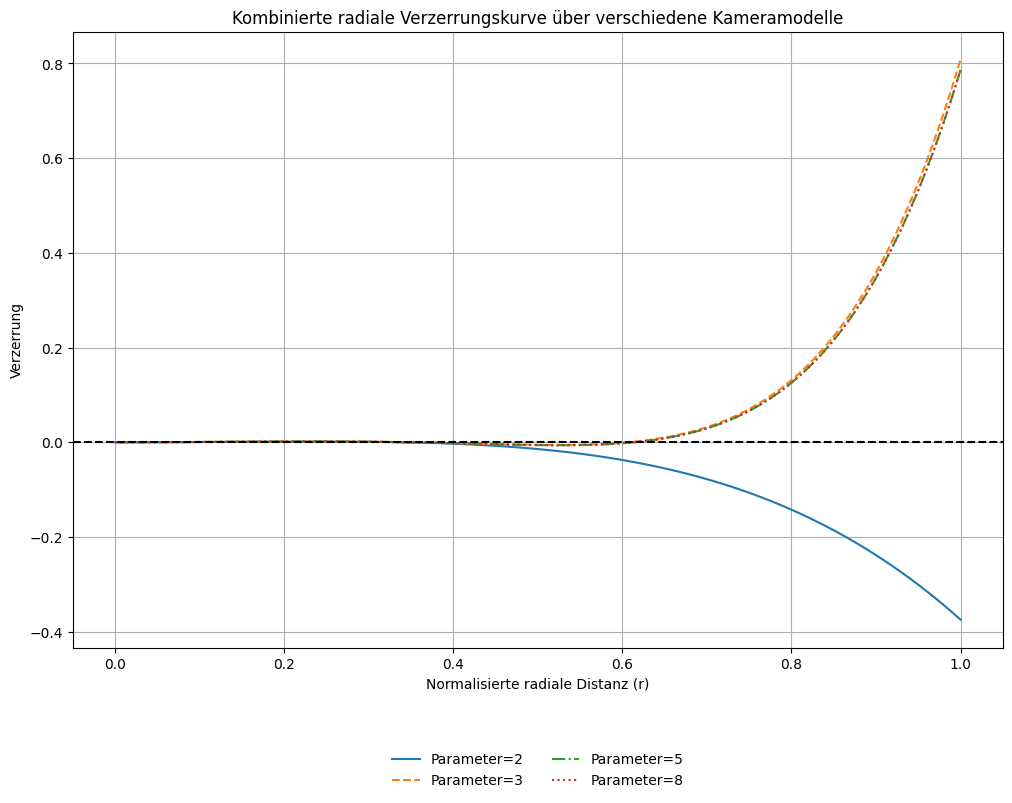

In [ ]:
run_combined_plot(all_dist_params_dict, num_params_list)

### 3.4 <a id="RPE-AIC"></a>**Reprojektionsfehler (RPE) und Akaike-Informationskriterium (AIC)**

Das Diagramm "Reprojektionsfehler (RPE) in Abhängigkeit von der Anzahl der Kalibrierungsbilder für verschiedene Kameramodelle" zeigt auf der x-Achse die Anzahl der verwendeten Kalibrierungsbilder, während die y-Achse den Reprojektionsfehler (RPE) anzeigt. 

Die Legende zeigt die finalen RPE-Werte sowie die entsprechenden Akaike-Informationskriterien (AIC) für jedes Modell. Ein niedrigerer RPE/AIC kann als Indikator für eine gute Kalibrierung und Anpassungsgüte interpretiert werden.

**Initiale Schwankungen und Stabilisierung**

Zu Beginn zeigen alle Modelle einen gewissen Grad an Schwankungen im Reprojektionsfehler (RPE). Dabei weist das Modell mit 2 Parametern die stärksten anfänglichen Schwankungen auf. Dies lässt den Schluss zu, dass weniger komplexe Modelle empfindlicher auf die Anzahl der Bilder reagieren, was zu größeren Schwankungen im RPE führt.

Die Modelle mit 3, 5 und 8 Parametern stabilisieren sich schneller und weisen weniger ausgeprägte anfängliche Schwankungen auf. Das Modell mit 3 Parametern zeigt jedoch etwas größere Schwankungen als die Modelle mit 5 und 8 Parametern.

**Plateau**

Nach anfänglichen Schwankungen zeigen alle Modelle eine Stabilisierung. Dabei weist das Modell mit 2 Parametern tendenziell höhere RPE-Werte auf, was darauf hindeutet, dass es weniger genau ist als die komplexeren Modelle.

Bei einer Anzahl von 60 bis 100 Bildern zeigen die Modelle leichte Schwankungen, was darauf hindeutet, dass zusätzliche Bilder weiterhin feine Anpassungen an den Modellen vornehmen können..

**Finale Reprojektionsfehler und AIC-Werte**

- Das Modell mit 2 Parametern weist den höchsten finalen RPE-Wert von **0,00702** sowie den höchsten AIC-Wert von **7435.14** auf. Dies lässt auf eine geringe Genauigkeit und eine suboptimale Anpassung an die Daten schließen. Das Modell mit 2 Parametern ist nicht in der Lage, die Komplexität der Daten adäquat abzubilden, was zu einer Unteranpassung führt

- Das Modell mit 3 Parametern weist einen niedrigeren finalen RPE-Wert von **0.00679** sowie einen AIC-Wert von **7309.88** auf. Dies demonstriert, dass das Modell mit 3 Parametern eine höhere Genauigkeit aufweist als das Modell mit 2 Parametern, jedoch noch nicht die Performance der Modelle mit 5 bzw. 8 Parametern erreicht.

- Die Modelle mit 5 und 8 Parametern zeigen identische finale RPE-Werte von **0.00666**, jedoch unterscheiden sich ihre AIC-Werte geringfügig. Das Modell mit fünf Parametern weist einen AIC-Wert von **7237.93** auf, während das Modell mit acht Parametern einen AIC-Wert von **7243.93** aufweist. Dies lässt den Schluss zu, dass das Modell mit 5 Parametern eine optimierte Balance zwischen Anpassungsgüte und Modellkomplexität aufweist.


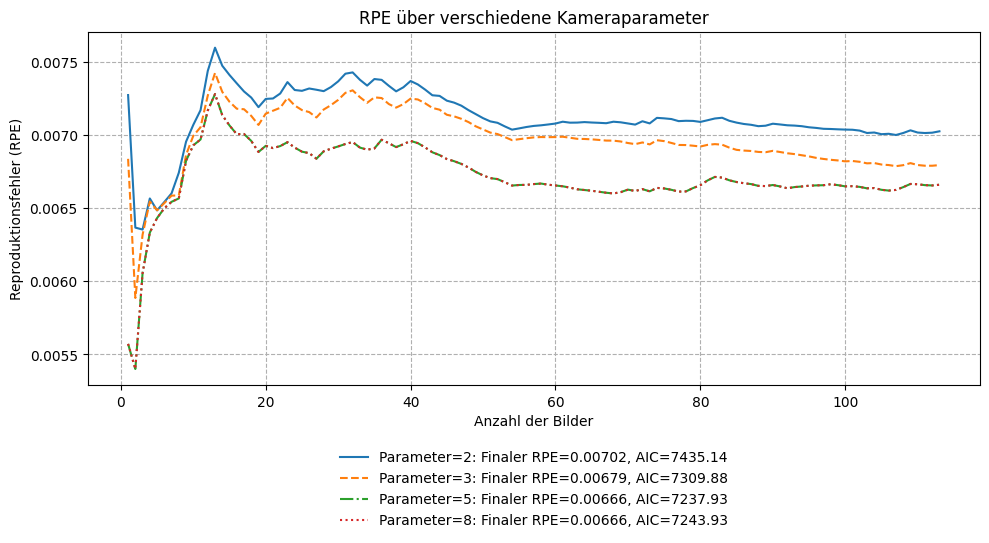

: 

In [ ]:
run_rpe(num_params_list, all_images, objpoints, imgpoints)


## 4. <a id="Zusammenfassung"></a>Zusammenfassung

Die Analyse der Verzerrungsparameter k₁, k₂, k₃, p₁, p₂ zeigt, dass die Verwendung komplexerer Kalibrierungsmodelle, welche eine größere Anzahl an Parametern aufweisen, zu stabileren und genaueren Schätzungen führt. 

Das Modell mit lediglich 2 Parametern zeigt die größte Schwankung sowie die niedrigste Genauigkeit, was sich in einem höheren Reprojektionsfehler (RPE) und einem höheren Akaike-Informationskriterium (AIC) widerspiegelt. Noch dazu ist das Modell mit 2 Parametern nicht flexibel genug, um die gegebene Verzerrungen in den Bildern zu korrigieren. Im Vergleich dazu weisen die Modelle mit 3, 5 bzw. 8 Parametern eine genauere Verzerrungskorrektur auf.

Das Modell mit 3 Parametern zeigt eine gute Anpassung, jedoch mit geringfügig höheren Verzerrungswerten, höheren RPE-Werten und geringfügig schlechteren AIC-Werten im Vergleich zu den Modellen mit 5 und 8 Parametern.

Zusammenfassend lässt sich festhalten, dass Modelle mit einer größeren Anzahl an Parametern eine präzisere Kalibrierung ermöglichen, jedoch auch mit einer höheren Komplexität und einem höheren Berechnungsaufwand verbunden sind. Das Modell mit 5 Parametern zeigt eine ausgewogene Kombination von Genauigkeit und Komplexität, während das Modell mit 8 Parametern eine identische Reprojektionsgenauigkeit und Verzerrungskorrektur aufweist, jedoch einen geringfügig höheren AIC-Wert erlangt. Dies lässt den Schluss zu, dass das Modell mit 8 Parametern zu komplex ist und lediglich dann zusätzliche Vorteile bietet, wenn die Verzerrungsparameter k₄, k₅, k₆ tatsächlich geschätzt werden und eine solche Verzerrung vorhanden ist.

## Quellen

<sup>1</sup> Calib.io. "Understanding Prameter Uncertainity" : https://calib.io/blogs/knowledge-base/understanding-parameter-uncertainty.

<sup>2</sup> OpenCV Dokumentation : https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ggad12cefbcb5291cf958a85b4b67b6149fa7bacbe84d400336a8f26297d8e80e3a2

<sup>3</sup> Mathworks "What Is Camera Caliberation?" : https://de.mathworks.com/help/vision/ug/camera-calibration.html

<sup>4</sup> Scribbr. "Akaike Information Criterion (AIC)." : https://www.scribbr.com/statistics/akaike-information-criterion/

<sup>5</sup> Mathworks "What Is Camera Caliberation?" : https://de.mathworks.com/help/vision/ug/camera-calibration.html

